# imports

In [2]:
# import state dicts and so on from evaluate_multi_task.py
from evaluate_multi_task import *

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from peta.tasks.ties_merging import (
    normalize,
    state_dict_to_vector,
    vector_to_state_dict,
)

# Compute Cos Similarity Matrix

## Full-finetuing

In [39]:
def compute_cos_similarity_as_df(
    task_vectors_as_state_dicts: Dict[str, Dict[str, Tensor]]
):
    task_vectors = torch.stack(
        [
            state_dict_to_vector(task_vectors_as_state_dicts[dataset_name])
            for dataset_name in DATASET_NAMES
        ]
    )
    normalized_task_vectors = normalize(task_vectors, dim=1)

    results = defaultdict(lambda: list())
    for task_0_idx, task_0 in tqdm(enumerate(DATASET_NAMES)):
        for task_1_idx, task_1 in enumerate(DATASET_NAMES):
            results["task:0"].append(task_0)
            results["task:1"].append(task_1)
            results["cosine_similarity"].append(
                F.cosine_similarity(
                    normalized_task_vectors[task_0_idx],
                    normalized_task_vectors[task_1_idx],
                    dim=0,
                ).item()
            )
    return pd.DataFrame(results)

In [46]:
task_vectors_as_state_dicts = fft_task_vector
fft_results = results = compute_cos_similarity_as_df(task_vectors_as_state_dicts)

7it [00:29,  4.19s/it]


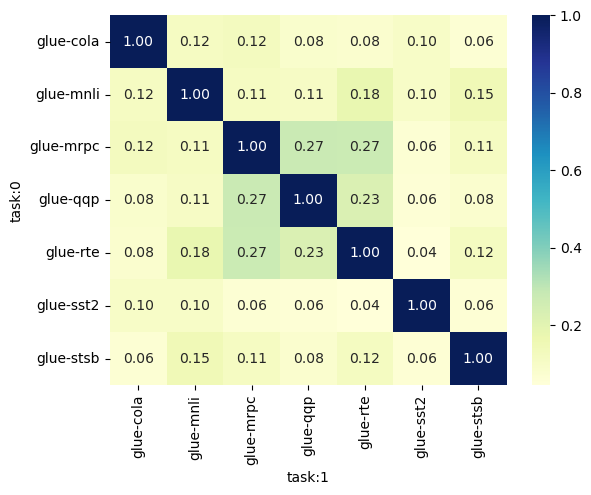

In [41]:
sns.heatmap(
    results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
)
plt.show()

## LoRA

In [47]:
lora_results = results = compute_cos_similarity_as_df(lora_task_vector)

7it [00:00, 334.55it/s]


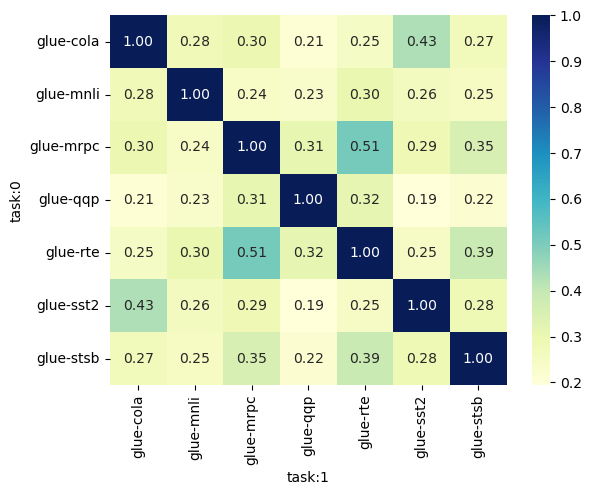

In [43]:
sns.heatmap(
    results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
)
plt.show()

## L-LoRA

In [48]:
l_lora_results = results = compute_cos_similarity_as_df(l_lora_task_vector)

7it [00:00, 330.43it/s]


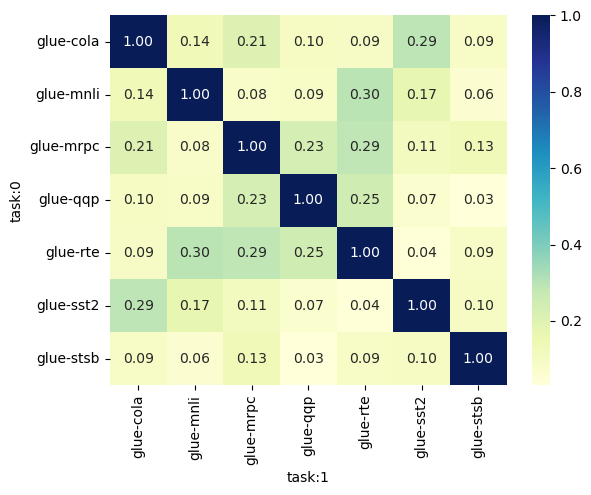

In [45]:
sns.heatmap(
    results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
)
plt.show()

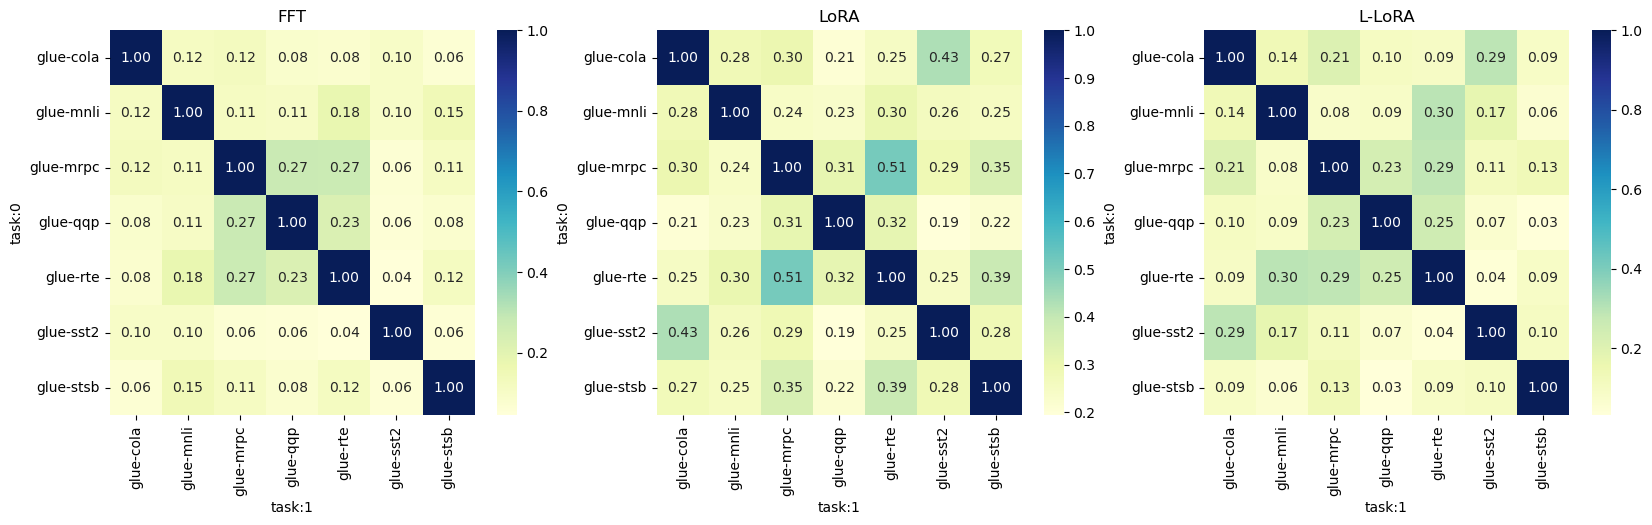

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(
    fft_results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    ax=axes[0],
)
axes[0].set_title("FFT")
sns.heatmap(
    lora_results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    ax=axes[1],
)
axes[1].set_title("LoRA")
sns.heatmap(
    l_lora_results.pivot(index="task:0", columns="task:1", values="cosine_similarity"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    ax=axes[2],
)
axes[2].set_title("L-LoRA")
plt.show()

In [53]:
fft_results.to_csv('results/flan-t5-base/fft_cos_similarity.csv')
lora_results.to_csv('results/flan-t5-base/lora_cos_similarity.csv')
l_lora_results.to_csv('results/flan-t5-base/l_lora_cos_similarity.csv')

In [58]:
val_datasets = {d: val_loaders[d] for d in DATASET_NAMES}

In [59]:
val_datasets

{'glue-cola': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa13fed1cf0>,
 'glue-mnli': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0da7793c0>,
 'glue-mrpc': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0da4356f0>,
 'glue-qqp': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0db04d810>,
 'glue-rte': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0da4ad660>,
 'glue-sst2': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0da578160>,
 'glue-stsb': <lightning.fabric.wrappers._FabricDataLoader at 0x7fa0da57b430>}